In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv('3.12.+Example.csv')

In [7]:
data
#brand loyalty is standardized, continuous and lies bw -2.5 to 2.5

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

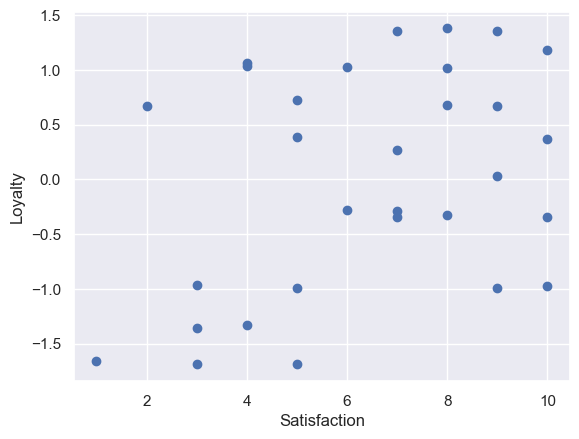

In [12]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [16]:
#2 clusters can be seen. Graph can be divided in 4 squares, low satisfaction low loyalty, low satisfaction high loyalty, high satisfaction high loyalty,
#high satisfaction low loyalty. A 2 cluster solution isn't appropriate for the data 
x=data.copy()

In [18]:
km=KMeans(2)
km.fit(x)

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [20]:
clu=x.copy()
clu['Pred_cluster']=km.fit_predict(x)

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Loyalty')

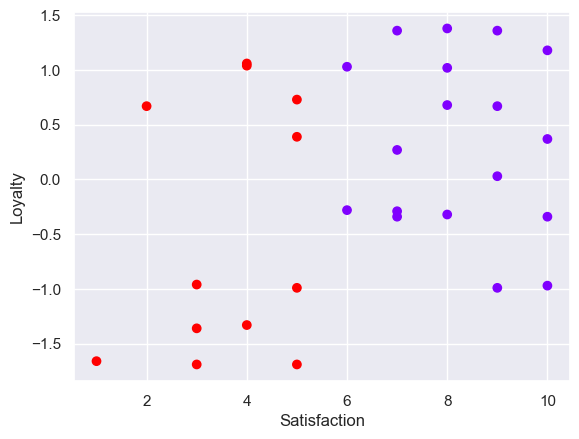

In [22]:
plt.scatter(clu['Satisfaction'],clu['Loyalty'],c=clu['Pred_cluster'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [24]:
#There's a cutoff line at satisfaction value of 6. Most probably lago only considered satisfaction as a feature because it wasn't standardized. 
#Satisfaction values are much higher than loyalty and km disregarded loyalty as a feature. When we cluster on the basis of a single feature, this is 
#what the result looks like, as if it was cutoff by a vertical line, it's 1 way to spot if something is wrong

In [28]:
#standardize vars
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [30]:
wcss=[]
for i in range(1,10):
    km=KMeans(i)
    km.fit(x_scaled)
    wcss.append(km.inertia_)

wcss

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

[59.99999999999999,
 29.818973034723143,
 18.634754239006423,
 10.24718180592842,
 7.792695153937187,
 8.017132847563055,
 6.072877408803195,
 5.972714344778939,
 4.287043701760361]

Text(0, 0.5, 'WCSS')

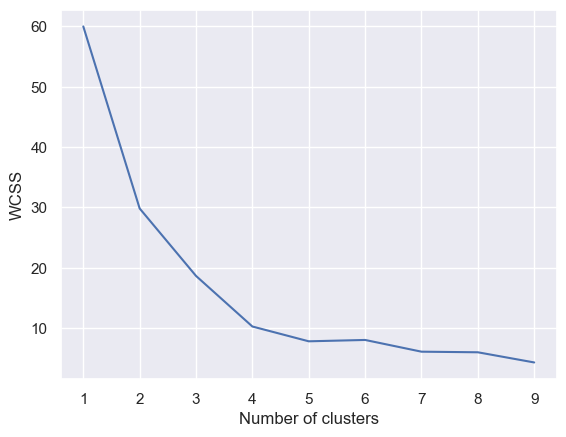

In [32]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
#we can see change in WCSS, but we don't know which solution is the best

In [34]:
km_n=KMeans(2)
km_n.fit(x_scaled)
clus_n=x.copy()
clus_n['Cluster_Pred']=km_n.fit_predict(x_scaled)

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
clus_n
#predicted values are base on standardized data, sati and lo are not. We'll plot data w/o standardizing axes, but solution will be stand 

,Satisfaction,Loyalty,Cluster_Pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

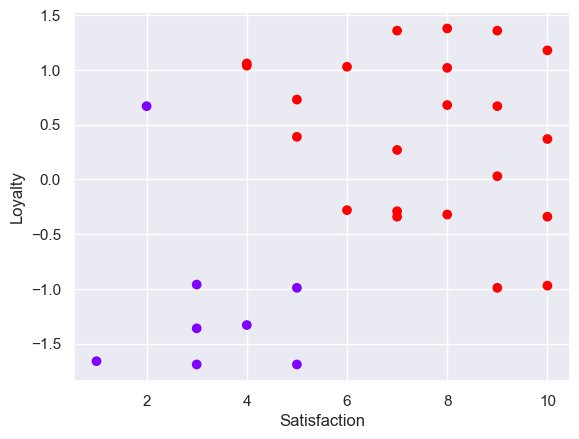

In [45]:
plt.scatter(clus_n['Satisfaction'],clus_n['Loyalty'],c=clus_n['Cluster_Pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [47]:
#if we had plot stande values, we would have been decieved. the diff depends on range of axis too
#it's important to interpret the results
#we can call the 2 groups alienated (low sat and loy) and everything else cluster as it's very heterogenous

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Loyalty')

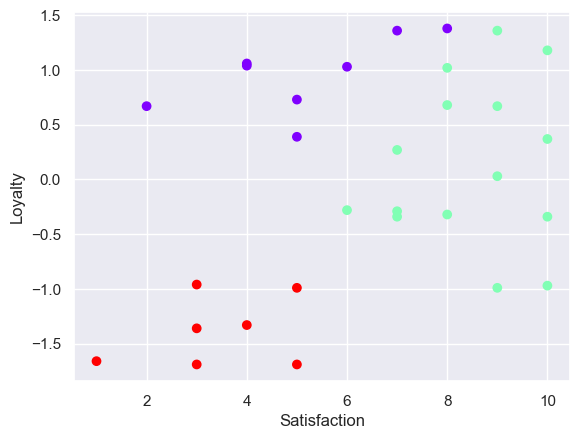

In [53]:
#try 3 clusters
km_n=KMeans(3)
km_n.fit(x_scaled)
clus_n=x.copy()
clus_n['Cluster_Pred']=km_n.fit_predict(x_scaled)
plt.scatter(clus_n['Satisfaction'],clus_n['Loyalty'],c=clus_n['Cluster_Pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [ ]:
#alienated cluster still remains, purple group can be called supporters, it's a small cluster, 3rd cluster is very mnixed                

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Loyalty')

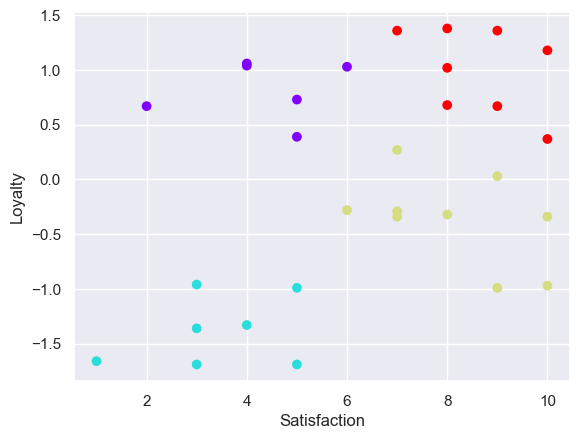

In [55]:
km_n=KMeans(4)
km_n.fit(x_scaled)
clus_n=x.copy()
clus_n['Cluster_Pred']=km_n.fit_predict(x_scaled)
plt.scatter(clus_n['Satisfaction'],clus_n['Loyalty'],c=clus_n['Cluster_Pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\navee\Documents\pytho\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Loyalty')

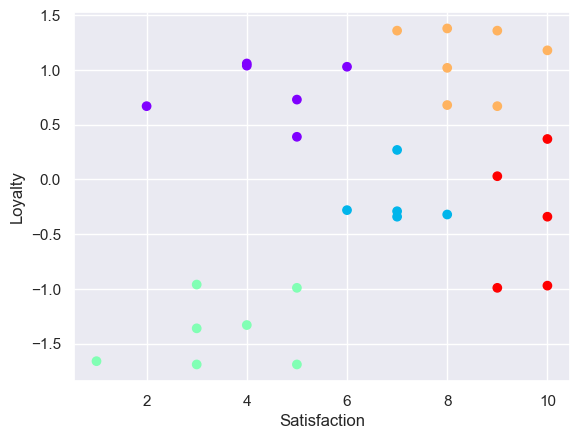

In [57]:
#red have high loyalty and satisfaction, they can be called fans, our core customers. yellow include disloyal members, they can be called roamers, they 
#like the brand but aren't loyal to it  
# try 5 clusters
km_n=KMeans(5)
km_n.fit(x_scaled)
clus_n=x.copy()
clus_n['Cluster_Pred']=km_n.fit_predict(x_scaled)
plt.scatter(clus_n['Satisfaction'],clus_n['Loyalty'],c=clus_n['Cluster_Pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [59]:
#blue are almost neutral on loyalty feature but are generally satisfied and they're also roamers. Roamers are split in 2 subclusetrs, extremely satisfied and just satisfied.
#4 and 5 clusters are the best one, which 1 you want depends on the problem